# Importing all the dependancies 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm
import math
import re
import seaborn as sns

from sklearn.linear_model import LogisticRegression

import xgboost
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import nltk
nltk.download('stopwords')

from sklearn.metrics import mean_absolute_error

nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
#Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv')

#test_data = pd.read_csv('E:\Fake News Detection/test.csv')
#submit = pd.read_csv('E:\Fake News Detection/submit.csv')
#df = pd.read_csv('train.csv')
# df = pd.read_csv('E:\Fake News Detection/train.csv')


In [28]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# Data Preprocessing

### Word Lemmatization
 Here I have implemented word lemmatization. Either this or Word stemmer should be executed before moving onto modelling. 

In [51]:
nltk.download('omw-1.4')

wordnet = WordNetLemmatizer()

def clean(text):
    text="".join([re.sub('[^a-zA-Z]',' ',char) for char in text])
    text=text.lower()
    text=text.split()
    text=[wordnet.lemmatize(word) for word in text if word not in set(stopwords.words("english"))]
    text=" ".join(text)
    return text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [52]:
# Defining a function to handle data cleaning and merging "title" , "author" columns to form "content" column.
def data_preprocess(f):
  df = pd.read_csv(f)
  df = df.fillna('')
  df['author'] = df['author'].str.lower()
  df['title'] = df['title'].apply(clean)
  df['content'] = df['author']+' '+df['title']
  X = df['content'].values
  return X


In [53]:
X_train = data_preprocess('/content/drive/MyDrive/train.csv')
X_test = data_preprocess('/content/drive/MyDrive/test.csv')


In [54]:
X_train.shape

(20800,)

In [55]:
X = np.concatenate((X_train,X_test))
X.shape

(26000,)

In [56]:
#Converting the textual data into numerical data using vertorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [57]:
print(X)

  (0, 21717)	0.3765282275856044
  (0, 18647)	0.24122769280324974
  (0, 12429)	0.34546267720410156
  (0, 12051)	0.27198938240602144
  (0, 10898)	0.233205808653743
  (0, 9864)	0.20527826772963503
  (0, 7092)	0.2584951207216014
  (0, 5309)	0.28134021239286905
  (0, 5015)	0.3420343924907894
  (0, 4057)	0.22654413040284457
  (0, 3403)	0.34546267720410156
  (0, 490)	0.2766995114340001
  (1, 23190)	0.26512560972323346
  (1, 9618)	0.19425837713877264
  (1, 7896)	0.7271057717680542
  (1, 4975)	0.27015247907294176
  (1, 3848)	0.19468834721222497
  (1, 3064)	0.3704664641648704
  (1, 2633)	0.1574836169039191
  (1, 2123)	0.3005942206504156
  (2, 21623)	0.3995659872102586
  (2, 13339)	0.4731566607341446
  (2, 8528)	0.3441631808852418
  (2, 7743)	0.4628166553574624
  (2, 4316)	0.4382817122414366
  :	:
  (25996, 8411)	0.2460750706836445
  (25996, 2147)	0.1977618344311623
  (25996, 139)	0.26401634218916786
  (25997, 23425)	0.11992985070525936
  (25997, 21223)	0.34047831288728947
  (25997, 21164)	0.1182

In [58]:
X_train = X[:20800]
X_test = X[20800:]

In [59]:
y = df['label'].values


In [60]:
y2 = df['label']
y2.shape

(20800,)

In [61]:
X.shape

(26000, 23640)

In [62]:
X_train.shape

(20800, 23640)




### **Don't execute the following if you are using Word lemmatization.** 
I have chosen Word Lemmatization as my final word embedding. If Word Stemmer is used then the code needs to be modified as such. 

### Word Stemmer 


In [14]:
#merging the "author" and "title" columns to form "Content"
df['content'] = df['author']+' '+df['title'] #+df['text']
df['content'].head()

0    Darrell Lucus House Dem Aide: We Didn’t Even S...
1    Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2    Consortiumnews.com Why the Truth Might Get You...
3    Jessica Purkiss 15 Civilians Killed In Single ...
4    Howard Portnoy Iranian woman jailed for fictio...
Name: content, dtype: object

In [ ]:
#Defining a function "clean" to stem to the words in content
stemmer = PorterStemmer()
def clean(text):
    text="".join([re.sub('[^a-zA-Z]',' ',char) for char in text])
    text=text.lower()
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words("english"))]
    text=" ".join(text)
    return text

In [ ]:
df['content'] = df['content'].apply(clean)

In [ ]:
# separating the data & label
X = df.drop(columns='label', axis=1)
y = df['label']

In [ ]:
print(df['content'])

0        darrell lucus house dem aide even see comey le...
1        daniel j. flynn flynn hillary clinton big woma...
2                 consortiumnews.com truth might get fired
3        jessica purkiss civilian killed single u airst...
4        howard portnoy iranian woman jailed fictional ...
                               ...                        
20795    jerome hudson rapper trump poster child white ...
20796    benjamin hoffman n f l playoff schedule matchu...
20797    michael j. de la merced and rachel abrams macy...
20798    alex ansary nato russia hold parallel exercise...
20799                           david swanson keep f alive
Name: content, Length: 20800, dtype: object


In [ ]:
# separating the data & label
X = df.drop(columns='label', axis=1)
y = df['label']

# Classification using Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y)


LogisticRegression()

In [ ]:
score_lr = cross_val_score(model, X_train, y, cv =10)

In [ ]:
print("The mean validaiton score after Logistic Regression on 10 fold CV is : {:.4f}\nThe standard deviation of the spread is : {:.4f} "
      .format(score_lr.mean(),score_lr.std()))

The mean validaiton score after Logistic Regression on 10 fold CV is : 0.9779
The standard deviation of the spread is : 0.0021 


In [ ]:
#Implementing Bagging ensemble on Logistic Regression Classifier
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator = LogisticRegression(), n_estimators = 100, n_jobs = -1,  max_features = 15000, random_state = 42)
bagging_clf.fit(X_train, y)

BaggingClassifier(base_estimator=LogisticRegression(), max_features=15000,
                  n_estimators=100, n_jobs=-1, random_state=42)

In [ ]:
score_bagging = cross_val_score(bagging_clf, X_train, y, cv =5)

In [ ]:
print("The mean validaiton score after Logistic Regression on 10 fold CV is : {:.4f}\nThe standard deviation of the spread is : {:.4f} "
      .format(score_bagging.mean(),score_bagging.std()))

The mean validaiton score after Logistic Regression on 10 fold CV is : 0.9718
The standard deviation of the spread is : 0.0034 


# Classification using XGBoost

In [ ]:
XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
model_xgboost = xgboost.XGBClassifier(n_estimators = 100,
                                     eval_metric = 'auc')

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model_xgboost, X_train, y, cv =10)

In [ ]:
print("The mean validaiton score on 10 fold CV is : {:.4f}\nThe standard deviation of the spread is : {:.4f} "
      .format(score.mean(),score.std()))


The mean validaiton score on 10 fold CV is : 0.9550
The standard deviation of the spread is : 0.0055 


## Hyperparameter tuning on XGBoost

In [ ]:
classifier = XGBClassifier()

In [ ]:
#Selecting superset of parameters to train on
params = {
    "learning_rate" : [0.01, 0.10, 0.25, 0.5, 1],
    "max_depth" : [3,5,10],
    "min_child_weight" : [1,3,5,7, 10, 13,17, 20],
    "gamma" : [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7, 1],
    
}

### RandomizedSearchCV

In [ ]:
#Hyperparameter tuning using Randomized Search CV
random_search =  RandomizedSearchCV(classifier, 
                                    param_distributions = params, 
                                    n_iter=10, #random_state = 1,
                                    scoring ="accuracy",  n_jobs =-1, cv=10, verbose =3)

In [ ]:
random_search.fit(X_train,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             1],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                  0.6, 0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.25, 0.5,
                                                          1],
                                        'max_depth': [3, 5, 10],
                                        'min_child_weight': [1, 3, 5, 7, 10, 13,
                                                             17, 20]},
                   scoring='accuracy', verbose=3)

In [ ]:
#Getting the best params from Random search
random_search.best_params_

{'colsample_bytree': 1,
 'gamma': 0.1,
 'learning_rate': 0.25,
 'max_depth': 10,
 'min_child_weight': 3}

In [ ]:
#Fitting the model with the best params we got
classifier = xgboost.XGBClassifier(min_child_weight= 1,
  max_depth= 9,
  learning_rate= 0.5,
  gamma= 0.7,
  colsample_bytree= 1,n_estimators = 100,eval_metric = 'auc')

In [ ]:
score_r = cross_val_score(classifier, X_train, y, cv =10, scoring = 'accuracy')


In [ ]:
print("The mean validaiton score on 10 fold CV using RandomizedSearchCV : {:.4f}\nThe standard deviation of the spread is : {:.4f} "
      .format(score_r.mean(),score_r.std()))


The mean validaiton score on 10 fold CV using RandomizedSearchCV : 0.9915
The standard deviation of the spread is : 0.0025 


### GridSearchCV

In [ ]:
random_search.best_params_

{'colsample_bytree': 1,
 'gamma': 0.1,
 'learning_rate': 0.25,
 'max_depth': 10,
 'min_child_weight': 3}

In [ ]:
params2 = {
    "learning_rate" : [0.25, 0.5, 1],
    "max_depth" : [5,9, 10],
    "min_child_weight" : [1,3],
    "gamma" : [ 0.1, 0.3, 0.5, 0.7],
    "colsample_bytree" : [ 0.5, 0.7, 1]
    
}

In [ ]:
grid_search = GridSearchCV( 
    estimator = classifier, param_grid = params2, scoring ="accuracy", n_jobs =-1, cv=5, verbose =3)

grid_search = grid_search.fit(X_train,y)

#print(model.best_score_)
#print(model.best_estimator_.get_params())

In [ ]:
grid_search.best_params_


{'colsample_bytree': 1,
 'gamma': 0.7,
 'learning_rate': 0.5,
 'max_depth': 9,
 'min_child_weight': 1}

In [ ]:
#Fitting the model with the best params we got
classifier = xgboost.XGBClassifier(min_child_weight= 1,
  max_depth= 9,
  learning_rate= 0.5,
  gamma= 0.7,
  colsample_bytree= 1,n_estimators = 100,eval_metric = 'auc')

In [ ]:
#Using Stratified Kfold validation for accuracy
skf = StratifiedKFold(n_splits=10)

score_g = cross_val_score(classifier, X_train, y, cv =skf, scoring = 'accuracy')

In [ ]:
print("The mean validaiton score on 10 fold CV using GridSearchCV : {:.4f}\nThe standard deviation of the spread is : {:.4f} "
      .format(score_g.mean(),score_g.std()))


The mean validaiton score on 10 fold CV using GridSearchCV : 0.9915
The standard deviation of the spread is : 0.0021 




###**Checking for Overfitting :**

In [42]:
from tqdm.notebook import tqdm


In [43]:
#Creating the train test split of each fold and storing the MAE values accordingly in an array.
skf = StratifiedKFold(n_splits=10)
from sklearn.metrics import log_loss
mae_train = []
mae_test = []
acc_train = []
acc_test = []
for train_index, test_index in tqdm(skf.split(X_train,y)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # X_train, X_test = X.iloc[train_index].to_numpy(), X.iloc[test_index].to_numpy()
  # y_train, y_test = y.iloc[train_index].to_numpy().ravel(), y.iloc[test_index].to_numpy().ravel()
  model = xgboost.XGBClassifier(min_child_weight= 1, max_depth= 9, learning_rate= 0.5, gamma= 0.7,
                                      colsample_bytree= 1,n_estimators = 100,eval_metric = 'auc')
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  acc_train.append(model.score(X_train,y_train))
  acc_test.append(model.score(X_test,y_test))
  mae_train.append(mean_absolute_error(y_train, y_train_pred))
  mae_test.append(mean_absolute_error(y_test, y_test_pred))


0it [00:00, ?it/s]

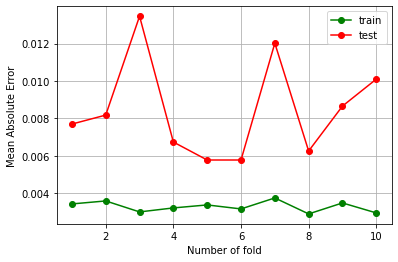

In [44]:
#Plotting the scores with MAE to check for overfitting
folds = range(1, skf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

As seen from the mean absolute error, both train and test data folds have small enough MAE to conclude that its not overfitting. 

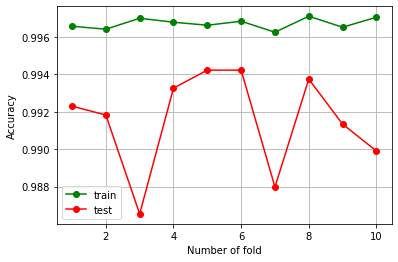

In [45]:
#Plotting the scores with accuracy to check for overfitting
folds = range(1, skf.get_n_splits() + 1)
plt.plot(folds, acc_train, 'o-', color='green', label='train')
plt.plot(folds, acc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Accuracy')
plt.show()

### Bayesian Optimization using HyperOpt

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, space_eval

In [ ]:
# Space
space = {
    'learning_rate': hp.choice('learning_rate', [ 0.01, 0.1, 0.25, 0.5, 1]),
    'max_depth' : hp.choice('max_depth', [3,5,9,10,11]),
    'min_child_weight' : hp.choice('min_child_weight', range(1,5)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,10)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,11)])
    #'reg_alpha' : hp.choice('reg_alpha', [0, 1e-5, 1e-2, 0.1, 1, 10, 100]), 
    #'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100])
}
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5)
# Objective function
def objective(params):
    
    xgboost = XGBClassifier(seed=42, **params)
    scores = cross_val_score(xgboost, X_train, y, cv=kfold, scoring='accuracy', n_jobs=-1)
    # Extract the best score
    best_score = max(scores)
    # Loss must be minimized
    loss = - best_score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
# Trials to track progress
bayes_trials = Trials()
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 100, trials = bayes_trials)

100%|█████████████████████████████████████████████| 100/100 [23:17<00:00, 13.97s/trial, best loss: -0.9935096153846154]


In [ ]:
# Print the index of the best parameters
# print(best)
# Print the values of the best parameters
print(space_eval(space, best))


{'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 9, 'min_child_weight': 1}


In [ ]:
#Fitting the model with the best params we got
classifier = xgboost.XGBClassifier(min_child_weight= 1,
  max_depth= 9,
  learning_rate= 0.5,
  gamma= 0.1,
  colsample_bytree= 1,
  n_estimators = 100,eval_metric = 'auc')

In [ ]:
#Using Stratified Kfold validation for accuracy
skf = StratifiedKFold(n_splits=10)
score_b = cross_val_score(classifier, X_train, y, cv =skf, scoring = 'accuracy')

In [ ]:
print("The mean validaiton score on 10 fold CV using GridSearchCV : {:.4f} \nThe standard deviation of the spread is : {:.4f}"
      .format(score_b.mean(),score_b.std()))


The mean validaiton score on 10 fold CV using GridSearchCV : 0.9916 
The standard deviation of the spread is : 0.0023


### TPOT Classifier

In [ ]:
import torch
from torch import nn
from tpot import TPOTClassifier

In [ ]:
params_tpot = {
    "learning_rate" : [0.1, 0.25, 0.5, 1],
    "max_depth" : [3,5,9,11],
    "min_child_weight" : [1,3],
    "gamma" : [0.0,0.1,0.3, 0.5, 0.6, 0.7],
    "colsample_bytree" : [0.4, 0.5, 0.7, 1]
    
}

In [ ]:
tpot_classifier = TPOTClassifier(generations =10, population_size = 24, offspring_size = 12,
                              verbosity = 2, early_stop = 12, random_state = 42,
                              config_dict = {'xgboost.XGBClassifier' : params_tpot},
                               cv = 5, scoring = 'accuracy') #cv = 5

#skf = StratifiedKFold(n_splits=5)
#score_tpot = cross_val_score(tpot_classifier, X, y, cv =skf, scoring = 'accuracy')
tpot_classifier.fit(X_train, y) ##if cv = 5 is passed as a parameter inside TPOTClassifier then run this. 


Generation 1 - Current best internal CV score: 0.9907211538461539

Generation 2 - Current best internal CV score: 0.9907211538461539

Generation 3 - Current best internal CV score: 0.9910096153846155

Generation 4 - Current best internal CV score: 0.9910096153846155

Generation 5 - Current best internal CV score: 0.9910096153846155

Generation 6 - Current best internal CV score: 0.9910096153846155

Generation 7 - Current best internal CV score: 0.9910096153846155

Generation 8 - Current best internal CV score: 0.9910096153846155

Generation 9 - Current best internal CV score: 0.9910096153846155

Generation 10 - Current best internal CV score: 0.9910096153846155

Best pipeline: XGBClassifier(CombineDFs(input_matrix, input_matrix), colsample_bytree=0.5, gamma=0.5, learning_rate=0.5, max_depth=9, min_child_weight=1)


TPOTClassifier(config_dict={'xgboost.XGBClassifier': {'colsample_bytree': [0.4,
                                                                           0.5,
                                                                           0.7,
                                                                           1],
                                                      'gamma': [0.0, 0.1, 0.3,
                                                                0.5, 0.6, 0.7],
                                                      'learning_rate': [0.1,
                                                                        0.25,
                                                                        0.5,
                                                                        1],
                                                      'max_depth': [3, 5, 9,
                                                                    11],
                                                      'min_child

In [ ]:
#Fitting the model with the best params we got
classifier = xgboost.XGBClassifier(min_child_weight= 1,
  max_depth= 9,
  learning_rate= 0.5,
  gamma= 0.5,
  colsample_bytree= 0.5,
  n_estimators = 100,eval_metric = 'auc')

In [ ]:
#Using Stratified Kfold validation for accuracy
skf = StratifiedKFold(n_splits=10)
score_tpot = cross_val_score(classifier, X_train, y, cv =skf, scoring = 'accuracy')

In [ ]:
print("The mean validaiton score on 10 fold CV using TPOTClassifier : {:.4f} \nThe standard deviation of the spread is : {:.4f}"
      .format(score_tpot.mean(),score_tpot.std()))

The mean validaiton score on 10 fold CV using TPOTClassifier : 0.9917 
The standard deviation of the spread is : 0.0023


In [ ]:
#accuracy = tpot_classifier.score(X_test, y_test)
#print('The accuracy on test data is :' ,accuracy)
#print(score_tpot.mean())

In [ ]:
#skf = StratifiedKFold(n_splits=5)
#score_tpot = cross_val_score(tpot_classifier, X, y, cv =skf, scoring = 'accuracy')

In [ ]:
#score_tpot.mean()

# **Classification using LightGBM :**

In [46]:
#pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import lightgbm as lgbm

In [69]:
clf = lgbm.LGBMClassifier(objective="binary", metric = 'auc', n_estimators = 100, random_state = 42, boosting_type = 'gbdt')

In [70]:
skf = StratifiedKFold(n_splits=10)
score_lgbm = cross_val_score(clf, X_train, y, cv =skf, scoring = 'accuracy')

In [71]:
print("The mean validaiton score on 10 fold CV using LightGBM : {:.4f} \nThe standard deviation of the spread is : {:.4f}"
      .format(score_lgbm.mean(),score_lgbm.std()))

The mean validaiton score on 10 fold CV using LightGBM : 0.9903 
The standard deviation of the spread is : 0.0023


##**Bayesian Optimization on LightGbm:**

In [72]:
from sklearn.metrics import precision_recall_fscore_support as score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, space_eval

In [87]:
# Space
space = {
    'learning_rate': hp.choice('learning_rate', [ 0.05, 0.1, 0.25, 0.5, 1]),
    'max_depth' : hp.choice('max_depth', [-1,3,5,9,10,11]),
    'num_leaves' : hp.choice('num_leaves', [11, 21, 31, 42, 51]),
    'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart']),
    'max_bin' : hp.choice('max_bin', [255, 300, 350]),
    
}
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=10)
# Objective function
def objective(params):
    
    clf = lgbm.LGBMClassifier(objective="binary", metric = 'auc', n_estimators = 100, random_state = 42, **params)
    scores = cross_val_score(clf, X_train, y, cv=kfold, scoring='accuracy', n_jobs=-1)
    # Extract the best score
    best_score = max(scores)
    # Loss must be minimized
    loss = - best_score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
# Trials to track progress
bayes_trials = Trials()
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 100, trials = bayes_trials)

100%|██████████| 100/100 [57:54<00:00, 34.75s/it, best loss: -0.9947115384615385]


In [88]:
print(space_eval(space, best))


{'boosting_type': 'dart', 'learning_rate': 0.5, 'max_bin': 300, 'max_depth': -1, 'num_leaves': 51}


In [89]:
params_lgbm = space_eval(space, best)

In [90]:
clf_bayesian = lgbm.LGBMClassifier(**params_lgbm)

In [91]:
skf = StratifiedKFold(n_splits=10)
score_lgbm = cross_val_score(clf_bayesian, X_train, y, cv =skf, scoring = 'accuracy')

In [92]:
print("The mean validaiton score on 10 fold CV using LightGBM after hyperparameter tuning : {:.4f}\nThe standard deviation of the spread is : {:.4f}"
        .format(score_lgbm.mean(),score_lgbm.std()))
      

The mean validaiton score on 10 fold CV using LightGBM after hyperparameter tuning : 0.9915
The standard deviation of the spread is : 0.0021


# Classification using AdaBoost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
tree = DecisionTreeClassifier(criterion = 'gini',
                              random_state = 42,
                              )

In [ ]:
boost = AdaBoostClassifier(base_estimator = tree,
                           n_estimators = 100,
                           algorithm = 'SAMME.R',
                           random_state = 42)

#boost.fit(X_train, y_train)

In [ ]:
score_ada = cross_val_score(boost, X_train, y, cv =10)

In [ ]:
print("The mean validaiton score on 10 fold CV : {:.4f} \nThe standard deviation of the spread is : {:.4f}"
      .format(score_ada.mean(),score_ada.std()))

The mean validaiton score on 10 fold CV : 0.9936 
The standard deviation of the spread is : 0.0013


## GridSearchCV on AdaBoost : 

In [ ]:
boost_g = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = 'gini',random_state = 42))

In [ ]:
params_ada = {
    "learning_rate" : [ 0.25, 0.5, 1],
    "n_estimators" : [50, 100, 200],
    "algorithm" : ['SAMME', 'SAMME.R'],
    
}

In [ ]:
grid_search = GridSearchCV(estimator = boost_g,  param_grid = params_ada,  scoring ="accuracy", n_jobs =-1, cv=5, verbose =3)
grid_search = grid_search.fit(X_train,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50}

In [ ]:
#Fitting the model with the best params we got

classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = 'gini',random_state = 42),
  learning_rate = 1,
  n_estimators = 50,
  algorithm = 'SAMME')


'''

classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = 'gini',random_state = 42),
  learning_rate = 0.25,
  n_estimators = 150,
  algorithm = 'SAMME.R')
'''

"\n\nclassifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = 'gini',random_state = 42),\n  learning_rate = 0.25,\n  n_estimators = 150,\n  algorithm = 'SAMME.R')\n"

In [ ]:
skf = StratifiedKFold(n_splits=10)

score_g = cross_val_score(classifier, X_train, y, cv =skf, scoring = 'accuracy')

In [ ]:
print("The mean validaiton score on 10 fold CV : {:.4f} \nThe standard deviation of the spread is : {:.4f}"
      .format(score_ada.mean(),score_ada.std()))

The mean validaiton score on 10 fold CV : 0.9936 
The standard deviation of the spread is : 0.0013


In [ ]:
score_ada

array([0.99423077, 0.99567308, 0.99134615, 0.99375   , 0.99471154,
       0.99375   , 0.99375   , 0.99182692, 0.99471154, 0.99230769])

#Submission File

**Choose the highest performing Classifier to fit the whole training dataset.**




In [ ]:
classifier.fit(X_train,y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(random_state=42),
                   learning_rate=1)

In [ ]:
y_test = classifier.predict(X_test)

In [ ]:
df_sub = pd.read_csv('/content/drive/MyDrive/submit.csv')
for i in range(len(df_sub)):
  df_sub['label'][i] = y_test[i]

df_sub.to_csv('submit_final.csv', index=False)
